# 📘 ZIPF'S LAW ANALYSIS: Ed Sheeran's Lyrics
# 👨‍💻 Team Members:
#       Jatin Bisen
#       Ansh Baheti
#       Divyansh Choudhary
#       Pushkar Gupta

# ✨ Objective:
# To analyze Ed Sheeran’s lyrics and validate if they follow Zipf’s Law — a natural law of word frequency in language.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from google.colab import files

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Upload the CSV file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("EdSheeran.csv")
df.head()


Saving EdSheeran.csv to EdSheeran.csv


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Ed Sheeran,Shape of You,÷ (Divide),2017.0,2017-01-06,the club isn't the best place to find a lover ...
1,1,Ed Sheeran,Perfect,÷ (Divide),2017.0,2017-03-03,i found a love for me oh darling just dive rig...
2,2,Ed Sheeran,Castle on the Hill,÷ (Divide),2017.0,2017-01-06,when i was six years old i broke my leg i was ...
3,3,Ed Sheeran,Happier,÷ (Divide),2017.0,2017-03-03,walking down 9th and park i saw you in another...
4,4,Ed Sheeran,Supermarket Flowers,÷ (Divide),2017.0,2017-03-03,i took the supermarket flowers from the window...


In [ ]:
print("Total Songs:", df['Title'].nunique())
df[['Title', 'Album', 'Year']].drop_duplicates().head()



Total Songs: 296


,Title,Album,Year
0,Shape of You,÷ (Divide),2017.0
1,Perfect,÷ (Divide),2017.0
2,Castle on the Hill,÷ (Divide),2017.0
3,Happier,÷ (Divide),2017.0
4,Supermarket Flowers,÷ (Divide),2017.0


<ipython-input-13-7177e2b3e65b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='cool')


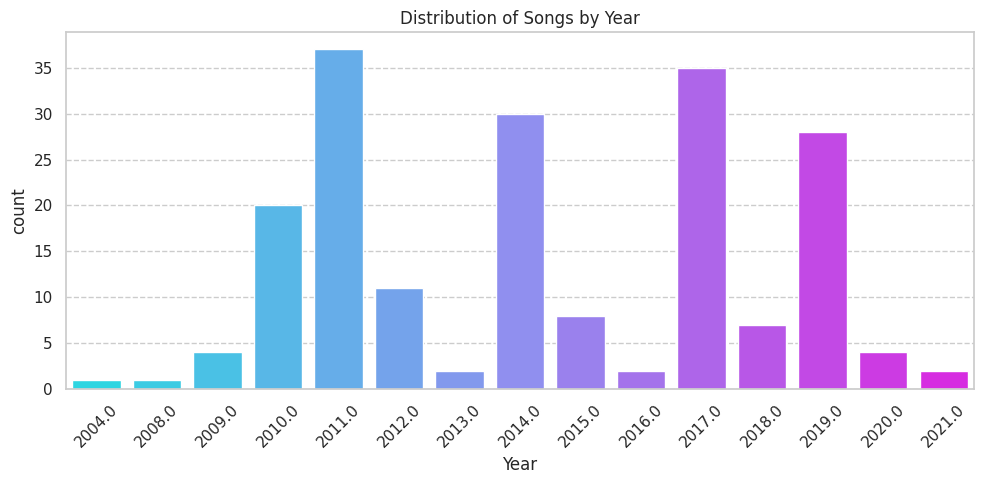

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year', palette='cool')
plt.title("Distribution of Songs by Year")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
lyrics = ' '.join(df['Lyric'].dropna().astype(str)).lower()
lyrics = re.sub(r'[^a-z\\s]', '', lyrics)
words = lyrics.split()

print(f"Total Words: {len(words)}")
print(f"Unique Words: {len(set(words))}")


Total Words: 1
Unique Words: 1


<ipython-input-11-902ec4bab375>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_counts.index, y=album_counts.values, palette='magma')


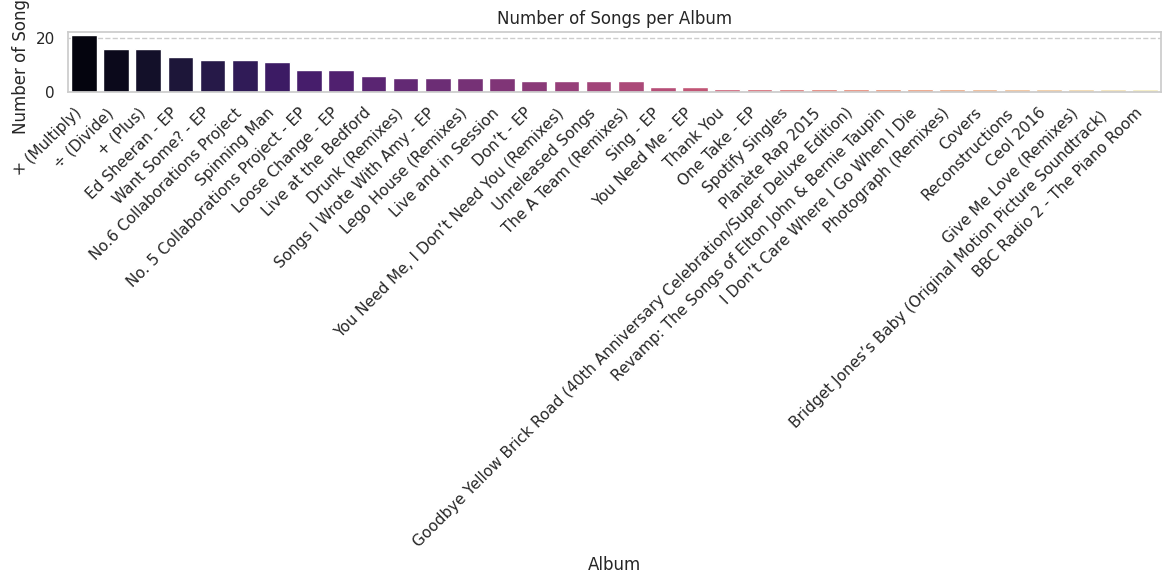

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Count the number of songs per album
album_counts = df['Album'].value_counts().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=album_counts.index, y=album_counts.values, palette='magma')
plt.title("Number of Songs per Album")
plt.ylabel("Number of Songs")
plt.xlabel("Album")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()


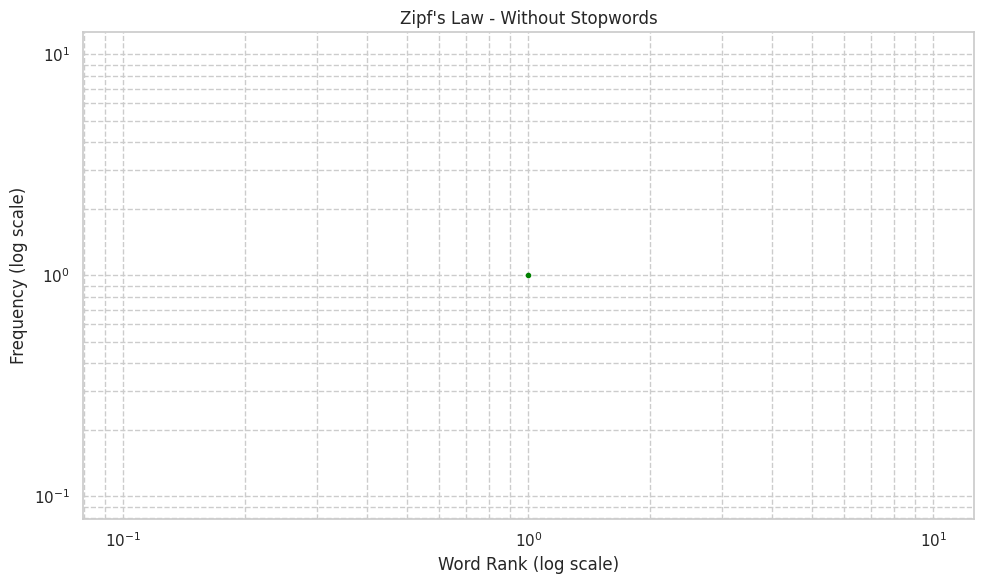

In [ ]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
filtered_freq = Counter(filtered_words)
filtered_values = sorted(filtered_freq.values(), reverse=True)
ranks_filtered = range(1, len(filtered_values) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks_filtered, filtered_values, marker='.', color='green')
plt.title("Zipf's Law - Without Stopwords")
plt.xlabel("Word Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True, which="both", linestyle='--')
plt.tight_layout()
plt.show()


   Unnamed: 0      Artist                Title       Album    Year  \
0           0  Ed Sheeran         Shape of You  ÷ (Divide)  2017.0   
1           1  Ed Sheeran              Perfect  ÷ (Divide)  2017.0   
2           2  Ed Sheeran   Castle on the Hill  ÷ (Divide)  2017.0   
3           3  Ed Sheeran              Happier  ÷ (Divide)  2017.0   
4           4  Ed Sheeran  Supermarket Flowers  ÷ (Divide)  2017.0   

         Date                                              Lyric  
0  2017-01-06  the club isn't the best place to find a lover ...  
1  2017-03-03  i found a love for me oh darling just dive rig...  
2  2017-01-06  when i was six years old i broke my leg i was ...  
3  2017-03-03  walking down 9th and park i saw you in another...  
4  2017-03-03  i took the supermarket flowers from the window...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -------------- 

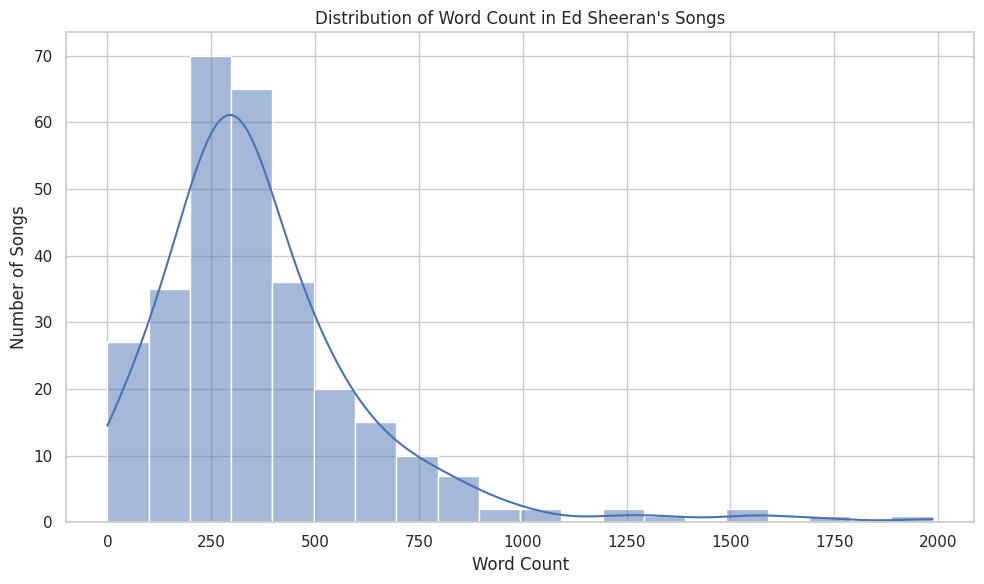

<ipython-input-14-75c58444b996>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


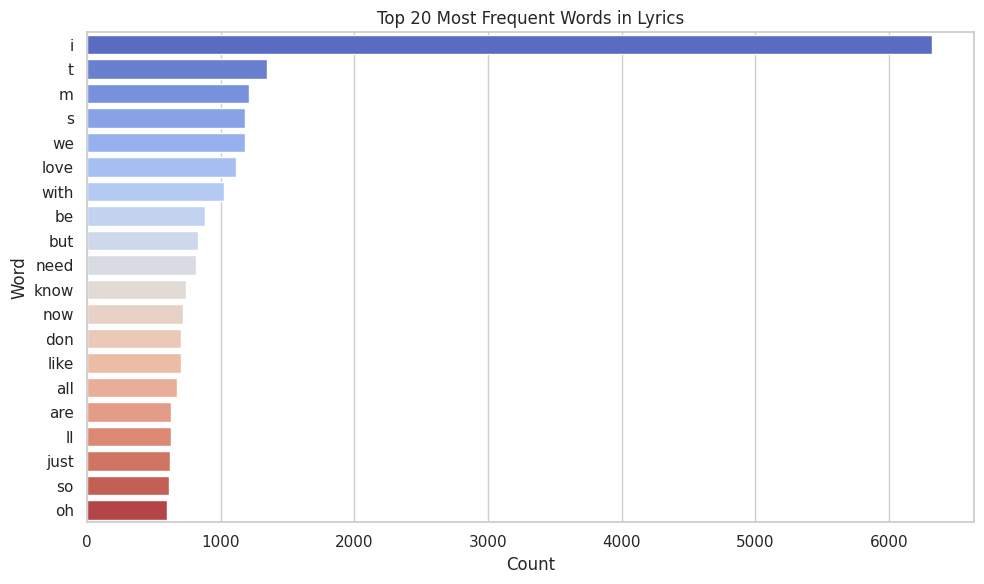

In [ ]:
# EDA for Ed Sheeran Lyrics Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
file_path = "EdSheeran.csv"  # adjust path as needed
df = pd.read_csv(file_path)

# Quick look
print(df.head())
print(df.info())

# 3. Distribution of lyric word counts
#    Compute word count
df["Lyric_Word_Count"] = df["Lyric"].fillna("").apply(lambda txt: len(txt.split()))

plt.figure(figsize=(10, 6))
sns.histplot(
    df["Lyric_Word_Count"],
    bins=20,
    kde=True
)
plt.title("Distribution of Word Count in Ed Sheeran's Songs")
plt.xlabel("Word Count")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()

# 5. (Bonus) Display top 20 most frequent words (excluding stopwords)
# Convert to DataFrame for easy plotting
mc_df = pd.DataFrame(most_common, columns=["word","count"])

plt.figure(figsize=(10, 6))
sns.barplot(
    x="count",
    y="word",
    data=mc_df,
    palette="coolwarm"
)
plt.title("Top 20 Most Frequent Words in Lyrics")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
import re

# basic stopword list
stopwords = set([
    "the","and","to","a","I","you","in","on","of","my","it","for","me","that","is","your"
])

all_words = []
for lyric in df["Lyric"].dropna():
    words = re.findall(r"\b\w+\b", lyric.lower())
    all_words.extend([w for w in words if w not in stopwords])

word_counts = Counter(all_words)
most_common = word_counts.most_common(20)


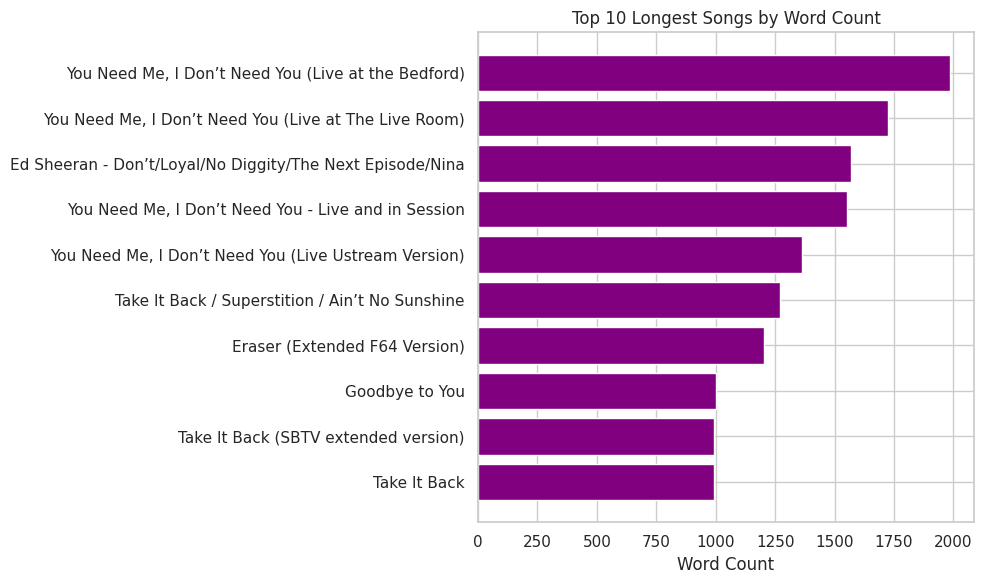

In [ ]:
df['Lyric'] = df['Lyric'].astype(str)  # Ensure all lyrics are strings
df['Word_Count'] = df['Lyric'].apply(lambda x: len(x.split()))
top_10 = df.nlargest(10, 'Word_Count')[['Title', 'Word_Count']]

# Barh Chart
plt.figure(figsize=(10, 6))
plt.barh(top_10['Title'], top_10['Word_Count'], color='purple')
plt.title("Top 10 Longest Songs by Word Count")
plt.xlabel("Word Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

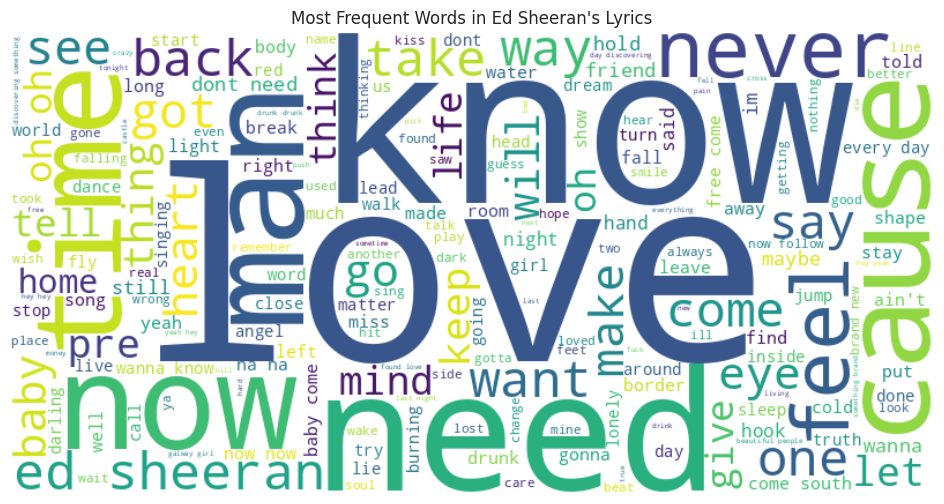

In [ ]:
from wordcloud import WordCloud

all_lyrics = ' '.join(df['Lyric'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Ed Sheeran's Lyrics")
plt.show()


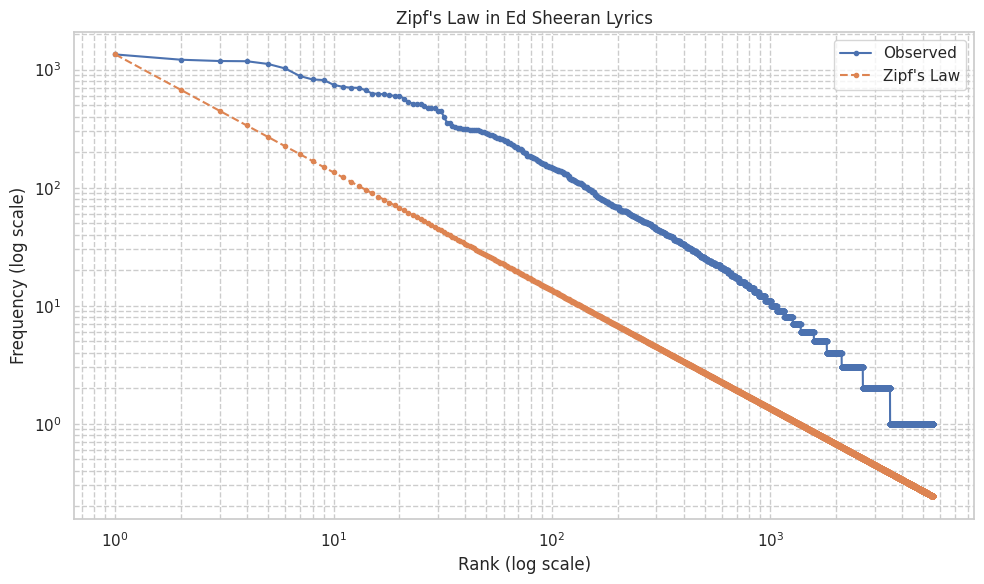

Correlation with Zipf's Law: -0.9855


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

# Assuming 'df' is your loaded DataFrame with a 'Lyric' column
stopwords = set([
    "the", "and", "to", "a", "i", "you", "in", "on", "of", "my", "it", "for", "me", "that", "is", "your"
])

# Extract all non-stop words from lyrics
all_words = []
for lyric in df["Lyric"].dropna():
    words = re.findall(r"\b\w+\b", lyric.lower())
    all_words.extend([w for w in words if w not in stopwords])

# Get word frequency counts
word_counts = Counter(all_words)

# Zipf's Law plotting
frequencies = sorted(word_counts.values(), reverse=True)
ranks = list(range(1, len(frequencies) + 1))
expected_frequencies = [frequencies[0] / r for r in ranks]

# Plot
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', label='Observed')
plt.loglog(ranks, expected_frequencies, marker='.', linestyle='--', label="Zipf's Law")
plt.title("Zipf's Law in Ed Sheeran Lyrics")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.tight_layout()
plt.show()

# Correlation coefficient
correlation = np.corrcoef(np.log(ranks), np.log(frequencies))[0, 1]
print(f"Correlation with Zipf's Law: {correlation:.4f}")


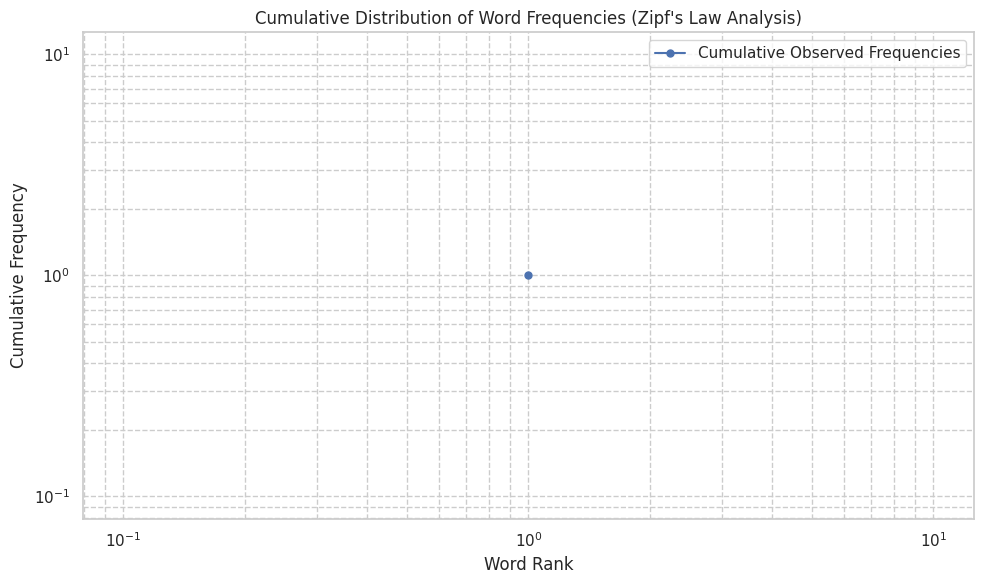

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'filtered_freq' is already defined and contains word frequencies

# Sort frequencies in descending order
frequencies = sorted(filtered_freq.values(), reverse=True)

# Calculate cumulative frequencies
cumulative_frequencies = np.cumsum(frequencies)

# Calculate ranks
ranks = np.arange(1, len(frequencies) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(ranks, cumulative_frequencies, marker='o', markersize=5, label='Cumulative Observed Frequencies')

plt.title("Cumulative Distribution of Word Frequencies (Zipf's Law Analysis)")
plt.xlabel("Word Rank")
plt.ylabel("Cumulative Frequency")
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.tight_layout()
plt.show()

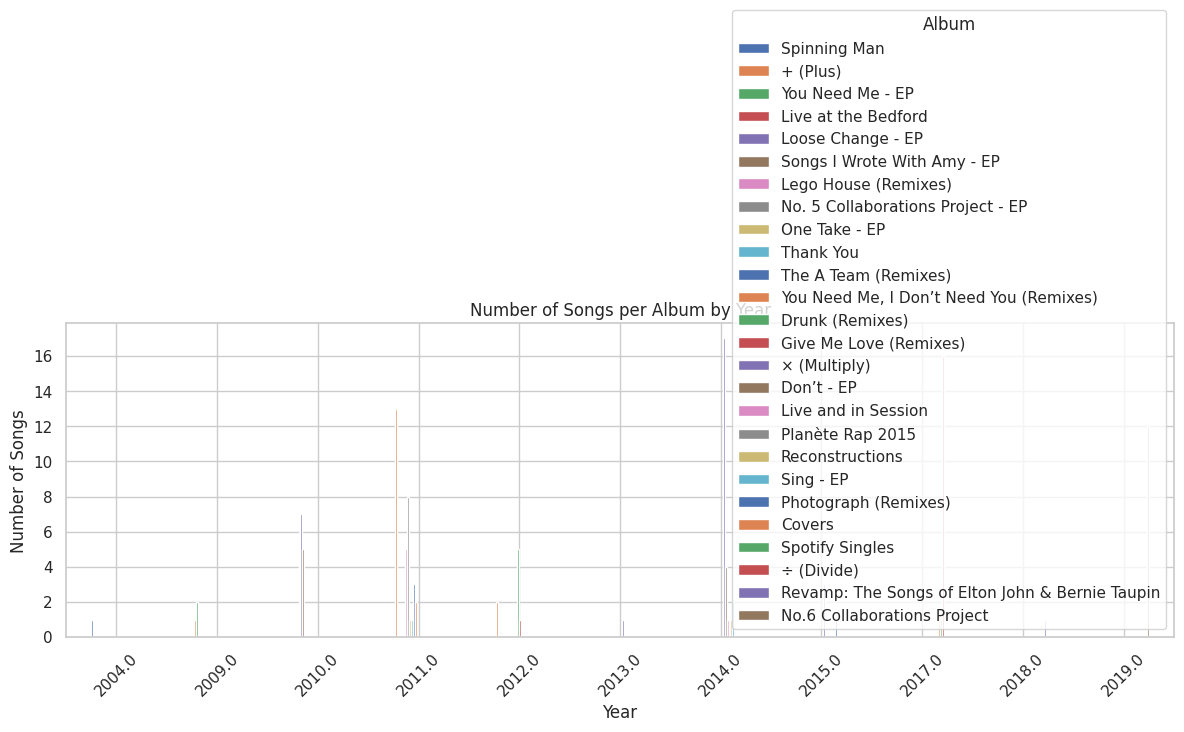

In [ ]:
# Grouping songs by Album and Year
grouped = df.groupby(['Year', 'Album']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title("Number of Songs per Album by Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.legend(title="Album")
plt.tight_layout()
plt.grid(True)
plt.show()


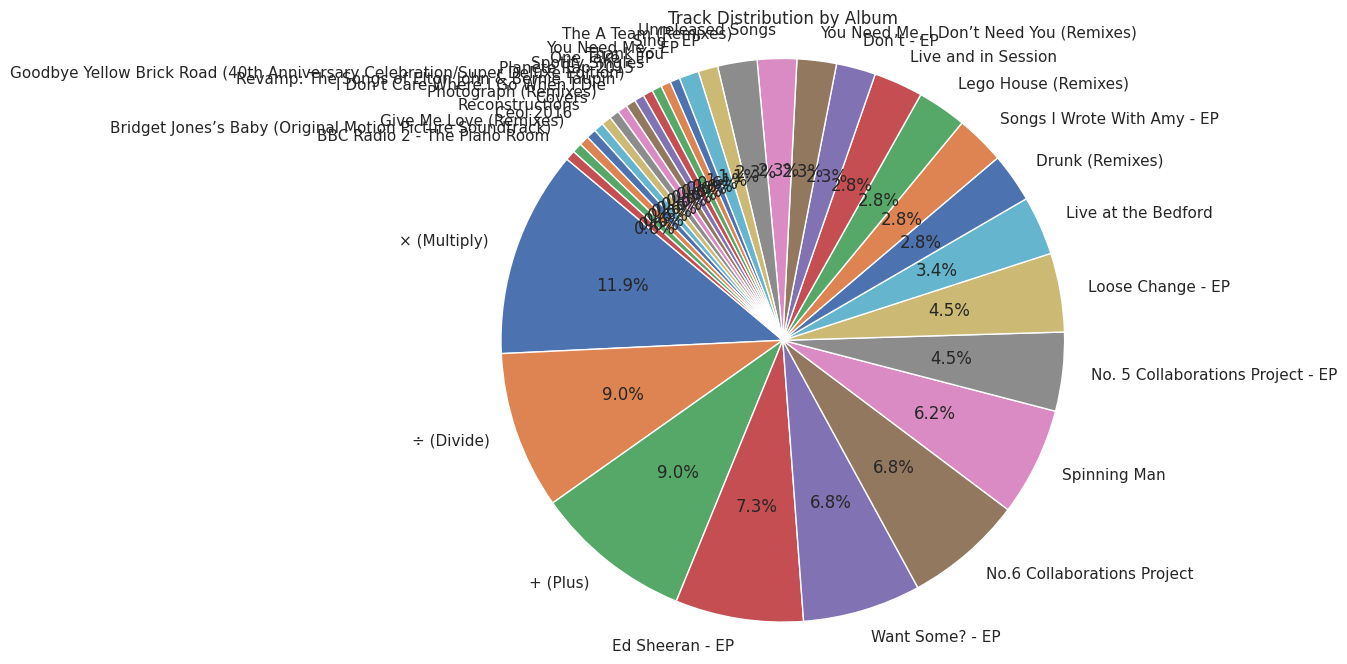

In [ ]:
album_counts = df['Album'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(album_counts, labels=album_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Track Distribution by Album")
plt.axis('equal')
plt.show()



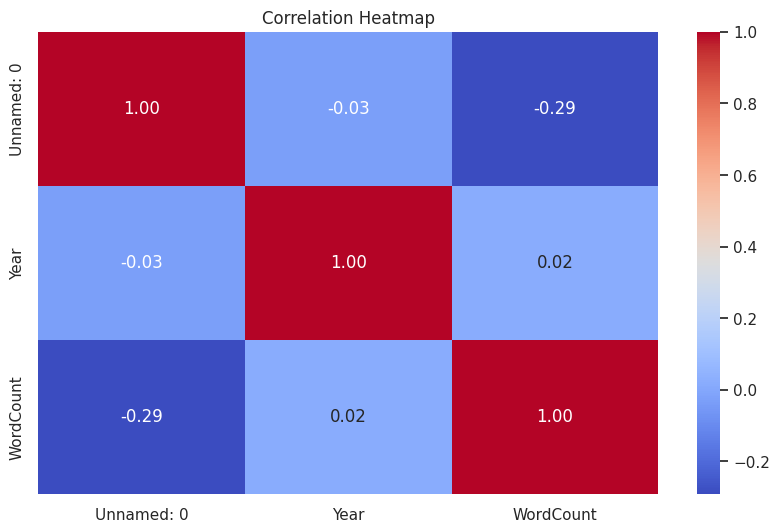

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



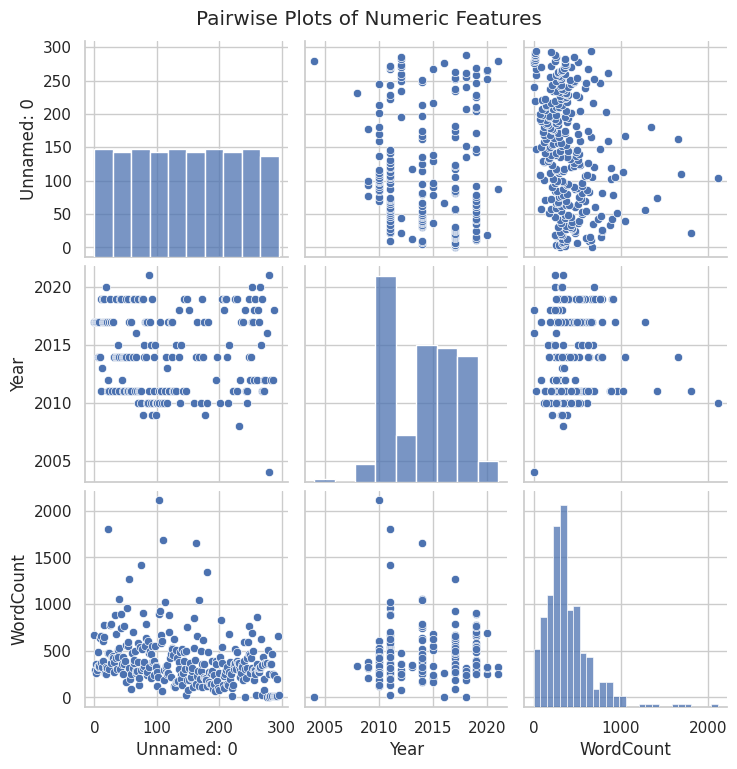

In [ ]:
# Plot pairwise relationships and then the heatmap
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle("Pairwise Plots of Numeric Features", y=1.02)
plt.show()
